<a href="https://colab.research.google.com/github/javohir-ergashboyev/DL-projects/blob/main/Object_Detection_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600  ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c cifar-10

100% 712M/715M [00:06<00:00, 129MB/s]
100% 715M/715M [00:06<00:00, 122MB/s]


In [4]:
from zipfile import ZipFile
dataset='/content/cifar-10.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
!pip install py7zr

In [6]:
import py7zr
archive=py7zr.SevenZipFile('/content/train.7z',mode='r')
archive.extractall()
archive.close()

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn.model_selection import train_test_split

In [11]:
filenames=os.listdir('/content/train')
filenames[:2]

['11727.png', '35573.png']

In [15]:
labels_df=pd.read_csv('trainLabels.csv')
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [17]:
labels_dict={'airplane':0,'automobile':1,'bird':2,'cat':3,'deer':4,'dog':5,'frog':6,'horse':7,'ship':8,'truck':9}
labels=[labels_dict[i] for i in labels_df['label']]


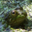

In [20]:
import cv2 as cv
from google.colab.patches import cv2_imshow
img=cv.imread('/content/train/11727.png')
cv2_imshow(img)

In [25]:
id_list=list(labels_df['id'])
id_list[-5]

49996

In [29]:
data=[]
path='/content/train/'
for id in id_list:
  image=Image.open(path+f'{id}.png')
  image=np.array(image)
  data.append(image)

In [30]:
type(data[1])

numpy.ndarray

In [ ]:
data[1]

In [33]:
X=np.array(data)
Y=np.array(labels)
X=X/255

In [35]:
xTrain,xTest,yTrain,yTest=train_test_split(X,Y,test_size=0.2,random_state=2)
X.shape,xTrain.shape,xTest.shape

((50000, 32, 32, 3), (40000, 32, 32, 3), (10000, 32, 32, 3))

In [36]:
import tensorflow as tf
from tensorflow import keras

In [37]:
num_classes=10
learn=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='softmax')
])

In [42]:
learn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
learn.fit(xTrain,yTrain,validation_split=0.1, epochs=10)

In [44]:
from tensorflow.keras import layers,Sequential,models
from tensorflow.keras.layers import Dense,Flatten,Dropout,BatchNormalization
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [45]:
convonutional_base=ResNet50(weights='imagenet',include_top=False, input_shape=(256,256,3))
convonutional_base.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [47]:
model=models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convonutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_classes,activation='softmax'))

In [48]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss='sparse_categorical_crossentropy', metrics=['acc'])

In [49]:
history=model.fit(xTrain,yTrain, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 469s 389ms/step - loss: 2.1516 - acc: 0.2301 - val_loss: 2.7092 - val_acc: 0.1807
Epoch 2/10
1125/1125 [==============================] - 437s 389ms/step - loss: 1.4823 - acc: 0.4677 - val_loss: 1.4051 - val_acc: 0.4983
Epoch 3/10
1125/1125 [==============================] - 445s 395ms/step - loss: 1.1941 - acc: 0.5865 - val_loss: 3.5323 - val_acc: 0.5203
Epoch 4/10
1125/1125 [==============================] - 446s 396ms/step - loss: 1.0396 - acc: 0.6466 - val_loss: 1.0824 - val_acc: 0.6237
Epoch 5/10
1125/1125 [==============================] - 445s 396ms/step - loss: 0.9143 - acc: 0.6966 - val_loss: 1.1316 - val_acc: 0.6137
Epoch 6/10
1125/1125 [==============================] - 445s 396ms/step - loss: 0.8101 - acc: 0.7335 - val_loss: 4.4538 - val_acc: 0.6367
Epoch 7/10
1125/1125 [==============================] - 439s 390ms/step - loss: 0.7302 - acc: 0.7641 - val_loss: 0.8343 - val_acc: 0.7260
Epoch 8/10
1125/1125 [============

In [51]:
loss,accuracy=model.evaluate(xTest,yTest)
print(accuracy)

313/313 [==============================] - 39s 120ms/step - loss: 0.7781 - acc: 0.7675
0.7674999833106995
